<a href="https://colab.research.google.com/github/GeekiAdubea/Wine-Quality---KMeans-Clustering/blob/master/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
wine_df = pd.read_csv('/content/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_df.shape

(1599, 12)

In [ ]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


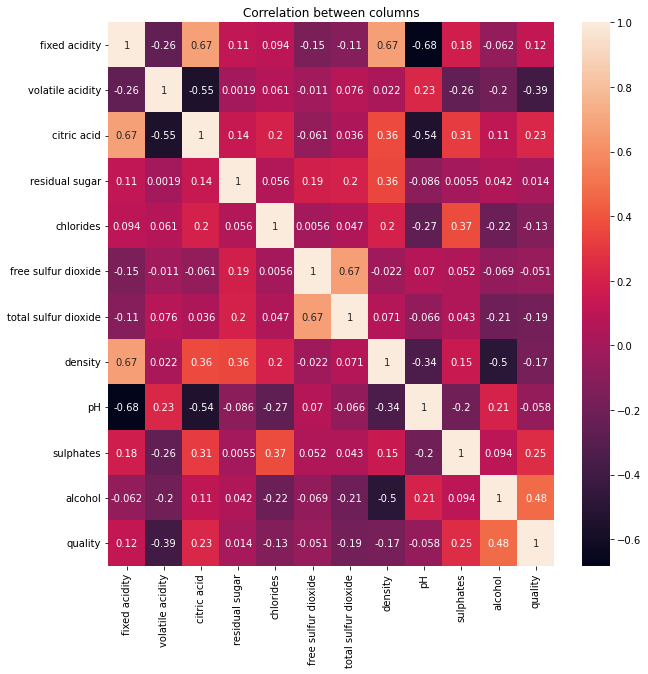

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_df.corr(), annot=True)
plt.title("Correlation between columns")
plt.show()

In [ ]:
wine_df = wine_df.drop('quality', axis=1)
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
 wcss = list()

 for i in range(1, 11):
   kmeans = KMeans(n_clusters=i, init="k-means++", random_state=47)
   kmeans.fit(wine_df)
   wcss.append(kmeans.inertia_)

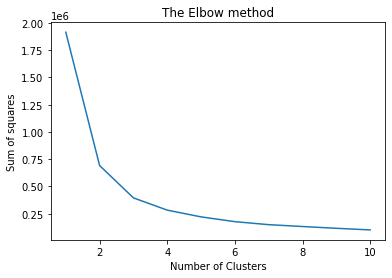

In [ ]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of squares")
plt.show()

In [ ]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


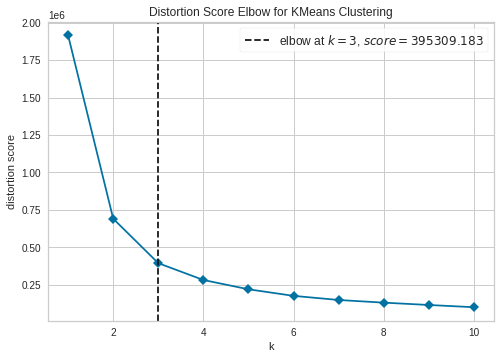

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings = False)
visualizer.fit(wine_df)
visualizer.show()

Silhouette Method

In [ ]:
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(wine_df)
  score = silhouette_score(wine_df, kmeans.labels_)
  print("for cluster: {}, the silhouette score is: {}".format(i,score))

for cluster: 2, the silhouette score is: 0.6034220347331241
for cluster: 3, the silhouette score is: 0.5197446557038226
for cluster: 4, the silhouette score is: 0.48971967046233833
for cluster: 5, the silhouette score is: 0.4477988752550526
for cluster: 6, the silhouette score is: 0.4485800365570335
for cluster: 7, the silhouette score is: 0.3940373555812897
for cluster: 8, the silhouette score is: 0.39125167029121855
for cluster: 9, the silhouette score is: 0.3872725709197768
for cluster: 10, the silhouette score is: 0.3841840179180526


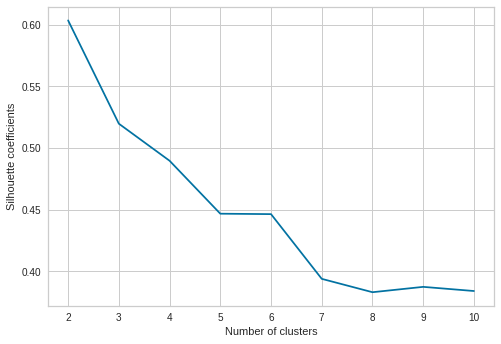

In [ ]:
silhouette_coefficients = list()
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(wine_df)
  score = silhouette_score(wine_df, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficients")
plt.show()

In [ ]:
pca = PCA()
X = pca.fit_transform(wine_df)

In [ ]:
kmeans = KMeans(n_clusters=3, init="k-means++")
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

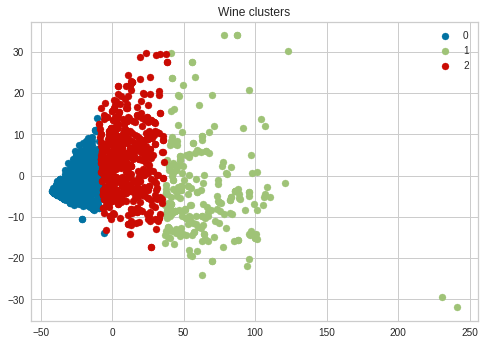

In [ ]:
for i in unique_labels:
  plt.scatter(X[label ==i,0], X[label==i,1],label = i)

plt.legend()
plt.title('Wine clusters')
plt.show()

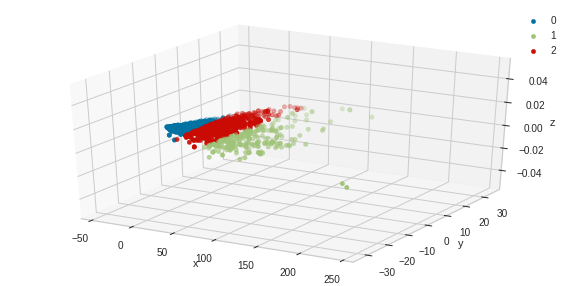

In [ ]:
#labels = np.unique(Y)  # Getting the labels

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111, projection='3d')

for i in unique_labels:
  ax.scatter(X[label ==i,0], X[label==i,1],label = i)

# ax.scatter(X[Y == 0,0],X[Y == 0,1], s = 20 , color = 'green', label = "cluster 0")  
# ax.scatter(X[Y == 1,0],X[Y == 1,1], s = 20 , color = 'red', label = "cluster 1")  
# ax.scatter(X[Y == 2,0],X[Y == 2,1], s = 20 , color = 'yellow', label = "cluster 2")  
# ax.scatter(X[Y == 3,0],X[Y == 3,1], s = 20 , color = 'violet', label = "cluster 3") 
# ax.scatter(X[Y == 4,0],X[Y == 4,1], s = 20 , color = 'blue', label = "cluster 4") 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()
plt.show()

In [ ]:
Y = pd.DataFrame(label)

Y.shape
Y

,0
0,0
1,2
2,2
3,2
4,0
...,...
1594,2
1595,2
1596,2
1597,2


In [ ]:
Y = Y.reset_index(drop=True) # resetting the index to get uniform index values

df = Y.join(wine_df)  # joining the "product clusters" with the "Description_NLP"

df.rename(columns={0:'Product Cluster'},inplace=True) # renaming the column

In [ ]:
df

,Product Cluster,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,2,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,2,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,2,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,2,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2
